<h1 style = "text-align:center"> <strong>Artificial Neural Network </strong></h1>

<h2 style = "text-align:center"> People Detection </h2>

<h5 style = "text-align:center"> Authors: <a href="https://github.com/AlvaroVasquezAI">Álvaro García Vásquez</a>, <a href="#">Luis Alfredo Cuamatzi Flores</a> and <a href="#">Fernando Daniel Portilla Posadas</a> </h5>

Description: This notebook shows how to implement an Artificial Neural Network to detect people in images.

<h3 style = 'text-align:center'> <strong>Dataset </strong></h3>

We created a dataset with 100 images of the city with people and animals, and 100 images of the city with animals but without people. After that, we split the dataset into four categories: Absent, Animal, Noise, and People (A, N, Noise, P). This was done with a program that divides each image into 128x128 grids, manually labeling each grid as A, N, Noise, or P. The program saves the grids in the corresponding folder. We also created a file .csv for both folders V1 and V2. Each file .csv contains NumberOfImage, NumberOfGrid, Class and TypeOfFile of each grid.

<strong>Features:</strong>
- Size: 1024x1024 pixels
- Format: PNG
- Channels: RGB
- Images generated with Artificial Intelligence

<strong>Folder structure before splitting the dataset:</strong>
- dataset
    - V1 (with people and animals)
        - 1.png
        - 2.png
        - ...
        - 100.png
    - V2 (without people but with animals)
        - 1.png
        - 2.png
        - ...
        - 100.png

<strong> Folder structure after splitting the dataset: </strong>
- dataset
    - V1 (with people and animals)
        - output
            - A (Absent)
                - grid_V1_numberOfImage_numberOfGrid_A.png
                - ...
            - N (Animal)
                - grid_V1_numberOfImage_numberOfGrid_N.png
                - ...
            - Noise (Noise)
                - grid_V1_numberOfImage_numberOfGrid_Noise.png
                - ...
            - P (People)
                - grid_V1_numberOfImage_numberOfGrid_P.png
        - 1.png
        - 2.png
        - ...
        - 100.png
    - V2 (without people but with animals)
        - output
            - A (Absent)
                - grid_V2_numberOfImage_numberOfGrid_A.png
                - ...
            - N (Animal)
                - grid_V2_numberOfImage_numberOfGrid_N.png
                - ...
            - Noise (Noise)
                - grid_V2_numberOfImage_numberOfGrid_Noise.png
                - ...
            - P (People)
                - grid_V2_numberOfImage_numberOfGrid_P.png
        - 1.png
        - 2.png
        - ...
        - 100.png


<h3 style='text-align:center'> <strong>Tool for labeling images:</strong> </h3>
<img src="resources/images/UI.png" alt="UI" style = "display:block; margin-left:auto; margin-right:auto; width:50%;">

<h3 style='text-align:center'> <strong>Image descriptors:</strong> </h3>

<table style='border: 1px solid black; width: 100%'>
<thead>
    <tr '>
        <th style='border: 1px solid black; padding: 8px; text-align: left;'>Descriptor</th>
        <th style='border: 1px solid black; padding: 8px; text-align: left;'>Description</th>
        <th style='border: 1px solid black; padding: 8px; text-align: left;'>Justification for Neural Network Training</th>
    </tr>
</thead>
<tbody>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>Color Channels (R, G, B)</td>
        <td style='border: 1px solid black; padding: 8px;'>Intensity values for red, green, and blue channels in the image.</td>
        <td style='border: 1px solid black; padding: 8px;'>Fundamental for capturing visual features, crucial for identifying elements like clothing or skin tones.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>RGB Mean</td>
        <td style='border: 1px solid black; padding: 8px;'>Average of the RGB values across the image.</td>
        <td style='border: 1px solid black; padding: 8px;'>Provides a baseline color metric, useful for color normalization and background differentiation.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>RGB Mode</td>
        <td style='border: 1px solid black; padding: 8px;'>Most frequent RGB values in the image.</td>
        <td style='border: 1px solid black; padding: 8px;'>Identifies dominant colors which can signify important features within the scene.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>RGB Variance</td>
        <td style='border: 1px solid black; padding: 8px;'>Measure of the spread of RGB values.</td>
        <td style='border: 1px solid black; padding: 8px;'>Useful for understanding color diversity, which might indicate areas of interest or changes in scene content.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>RGB Standard Deviation</td>
        <td style='border: 1px solid black; padding: 8px;'>Standard deviation of RGB values.</td>
        <td style='border: 1px solid black; padding: 8px;'>Highlights areas with high color variability, important for detecting edges and contours.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>Color Histogram</td>
        <td style='border: 1px solid black; padding: 8px;'>Distribution of pixel intensities in color channels.</td>
        <td style='border: 1px solid black; padding: 8px;'>Essential for analyzing the color distribution and for segmenting images based on color intensity.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>Gray Level Co-occurrence Matrix Properties</td>
        <td style='border: 1px solid black; padding: 8px;'>Statistical features extracted from how often different combinations of pixel brightness values (gray levels) occur in an image.</td>
        <td style='border: 1px solid black; padding: 8px;'>Provides textural features which are critical for recognizing patterns and structures within images that might not be visible through color alone.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>Local Binary Patterns</td>
        <td style='border: 1px solid black; padding: 8px;'>Method for texture description where each pixel is compared with its surrounding pixels.</td>
        <td style='border: 1px solid black; padding: 8px;'>Useful for texture classification, a fundamental aspect when differentiating between different objects and their surroundings.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>Histogram of Oriented Gradients (HOG)</td>
        <td style='border: 1px solid black; padding: 8px;'>Counts occurrences of gradient orientation in localized portions of an image.</td>
        <td style='border: 1px solid black; padding: 8px;'>Effective for object detection in vision tasks, particularly useful for detecting human forms in various poses and lighting conditions.</td>
    </tr>
    <tr>
        <td style='border: 1px solid black; padding: 8px;'>Peak Local Max</td>
        <td style='border: 1px solid black; padding: 8px;'>Identifies local maxima in an image, points where the region around a pixel has lower intensity values.</td>
        <td style='border: 1px solid black; padding: 8px;'>Helps to detect key points, which are essential for tasks like feature matching and scene understanding.</td>
    </tr>
</tbody>
</table>

<h3 style='text-align:center'> <strong>Extracted Features:</strong> </h3>

In [48]:
import numpy as np
import skimage.feature
import skimage.measure
import skimage.filters
import matplotlib.pyplot as plt

In [49]:
class Image:
    def __init__(self, image, name): 
        self.image = image
        self.name = name
        self.numberOfGrid = name.split("_")[3]
        self.numberOfImageBelonging = name.split("_")[2]
        self.datasetBelonging = name.split("_")[1]
        self.classBelonging = name.split("_")[4]
        self.size = image.shape
        
        self.colorChannelsRGB = None
        self.RGBMean = None
        self.RGBMode = None
        self.RGBVariance = None
        self.RGBStandardDeviation = None
        self.colorHistogram = None

        self.grayLevelCooccurrenceMatrixProperties = None
        self.localBinaryPatterns = None
        self.histogramOfOrientedGradients = None
        self.peakLocalMax = None


    def getImage(self):
        return self.image
    
    def getName(self):
        return self.name

    def getNumberOfGrid(self):
        return self.numberOfGrid
    
    def getNumberOfImageBelonging(self):
        return self.numberOfImageBelonging
    
    def getDatasetBelonging(self):
        return self.datasetBelonging
    
    def getClassBelonging(self):
        return self.classBelonging
    
    def getSize(self):
        return self.size
     
    def getColorChannelsRGB(self):

        if self.colorChannelsRGB is None:
            
            # Get the color channels
            redChannel = self.image[:,:,0]
            greenChannel = self.image[:,:,1]
            blueChannel = self.image[:,:,2]

            self.colorChannelsRGB = [redChannel, greenChannel, blueChannel]

        return self.colorChannelsRGB
    
    def getRGBMean(self):
        if self.RGBMean is None: 
            # Get the color channels
            redChannel = self.image[:,:,0]
            greenChannel = self.image[:,:,1]
            blueChannel = self.image[:,:,2]

            # Get the mean of each channel
            redMean = np.mean(redChannel)
            greenMean = np.mean(greenChannel)
            blueMean = np.mean(blueChannel)

            self.RGBMean = [redMean, greenMean, blueMean]

        return self.RGBMean
    
    def getRGBMode(self):
        if self.RGBMode is None:
            
            # Get the color channels
            redChannel = self.image[:,:,0]
            greenChannel = self.image[:,:,1]
            blueChannel = self.image[:,:,2]

            # Get the mode of each channel
            redMode = skimage.exposure.histogram(redChannel)[1].argmax()
            greenMode = skimage.exposure.histogram(greenChannel)[1].argmax()
            blueMode = skimage.exposure.histogram(blueChannel)[1].argmax()

            self.RGBMode = [redMode, greenMode, blueMode]

        return self.RGBMode
    
    def getRGBVariance(self):
        if self.RGBVariance is None:
            
            # Get the color channels
            redChannel = self.image[:,:,0]
            greenChannel = self.image[:,:,1]
            blueChannel = self.image[:,:,2]

            # Get the variance of each channel
            redVariance = np.var(redChannel.flatten())
            greenVariance = np.var(greenChannel.flatten())
            blueVariance = np.var(blueChannel.flatten())

            self.RGBVariance = [redVariance, greenVariance, blueVariance]

        return self.RGBVariance
    
    def getRGBStandardDeviation(self):
        if self.RGBStandardDeviation is None:
            
            # Get the color channels
            redChannel = self.image[:,:,0]
            greenChannel = self.image[:,:,1]
            blueChannel = self.image[:,:,2]

            # Get the standard deviation of each channel
            redStandardDeviation = np.std(redChannel)
            greenStandardDeviation = np.std(greenChannel)
            blueStandardDeviation = np.std(blueChannel)

            self.RGBStandardDeviation = [redStandardDeviation, greenStandardDeviation, blueStandardDeviation]

        return self.RGBStandardDeviation
    
    def getColorHistogram(self):
        if self.colorHistogram is None:
            
            # Get the color channels
            redChannel = self.image[:,:,0]
            greenChannel = self.image[:,:,1]
            blueChannel = self.image[:,:,2]

            # Get the color histogram
            redHistogram = skimage.exposure.histogram(redChannel)[0]
            greenHistogram = skimage.exposure.histogram(greenChannel)[0]
            blueHistogram = skimage.exposure.histogram(blueChannel)[0]

            self.colorHistogram = [redHistogram, greenHistogram, blueHistogram]

        return self.colorHistogram

    def getGrayLevelCooccurrenceMatrixProperties(self):
        if self.grayLevelCooccurrenceMatrixProperties is None:
            # Convertir a escala de grises
            image_gray = skimage.color.rgb2gray(self.image)
            # Escalar a 0-255 y convertir a uint8
            image_gray_u8 = (image_gray * 255).astype(np.uint8)
            # Calcular la matriz de co-ocurrencia de nivel de gris sin usar greycomatrix
            glcm = skimage.feature.graycomatrix(image_gray_u8, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
            # Calcular propiedades de la matriz
            contrast = skimage.feature.graycoprops(glcm, 'contrast')[0, 0]
            dissimilarity = skimage.feature.graycoprops(glcm, 'dissimilarity')[0, 0]
            homogeneity = skimage.feature.graycoprops(glcm, 'homogeneity')[0, 0]
            energy = skimage.feature.graycoprops(glcm, 'energy')[0, 0]
            correlation = skimage.feature.graycoprops(glcm, 'correlation')[0, 0]
            self.grayLevelCooccurrenceMatrixProperties = [contrast, dissimilarity, homogeneity, energy, correlation]
        return self.grayLevelCooccurrenceMatrixProperties


    def getLocalBinaryPatterns(self):
        if self.localBinaryPatterns is None:
            # Convertir a escala de grises
            image_gray = skimage.color.rgb2gray(self.image)
            # Calcular patrones binarios locales
            self.localBinaryPatterns = skimage.feature.local_binary_pattern(image_gray, P=8, R=1, method='uniform')
        return self.localBinaryPatterns

    def getHistogramOfOrientedGradients(self):
        if self.histogramOfOrientedGradients is None:
            # Convertir a escala de grises
            image_gray = skimage.color.rgb2gray(self.image)
            # Calcular el histograma de gradientes orientados
            self.histogramOfOrientedGradients = skimage.feature.hog(image_gray, pixels_per_cell=(16, 16), cells_per_block=(1, 1), orientations=9, visualize=False)
        return self.histogramOfOrientedGradients

    def getPeakLocalMax(self):
        if self.peakLocalMax is None:
            # Detectar máximos locales en la imagen
            image_gray = skimage.color.rgb2gray(self.image)
            self.peakLocalMax = skimage.feature.peak_local_max(image_gray, min_distance=1, threshold_abs=0.1, num_peaks=10)
        return self.peakLocalMax

Try to extract the following features from just one image:

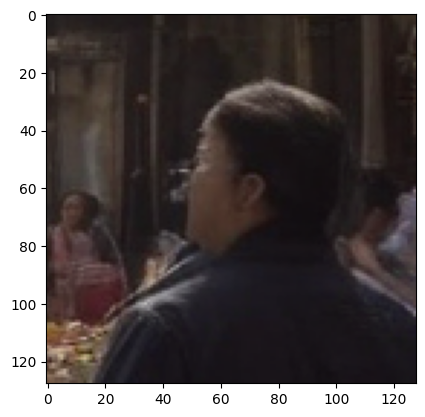

In [50]:
testImgPath = "dataset/V1/output/P/grid_V1_4_40_P.png"

image = skimage.io.imread(testImgPath)
ImageTest = Image(image, "grid_V1_4_40_P.png")

# Plot the image
plt.imshow(image)


Color Channels

In [51]:
print("Color channels RGB:")
print(ImageTest.getColorChannelsRGB())

Color channels RGB:
[array([[ 37,  37,  37, ...,  54,  55,  55],
       [ 35,  36,  35, ...,  55,  55,  57],
       [ 34,  36,  36, ...,  52,  51,  54],
       ...,
       [136, 136, 130, ...,  25,  25,  25],
       [121, 128, 120, ...,  24,  24,  25],
       [112, 117, 117, ...,  25,  25,  25]], dtype=uint8), array([[ 31,  31,  31, ...,  43,  45,  45],
       [ 30,  31,  29, ...,  45,  46,  47],
       [ 31,  32,  31, ...,  41,  40,  44],
       ...,
       [111, 111, 106, ...,  22,  22,  21],
       [ 95, 101,  96, ...,  22,  21,  21],
       [ 85,  91,  93, ...,  22,  22,  21]], dtype=uint8), array([[33, 32, 34, ..., 35, 36, 37],
       [30, 31, 31, ..., 35, 35, 38],
       [31, 31, 31, ..., 34, 31, 36],
       ...,
       [91, 92, 87, ..., 26, 26, 27],
       [77, 83, 78, ..., 27, 26, 26],
       [68, 73, 74, ..., 26, 25, 25]], dtype=uint8)]


RGB Mean

In [52]:
print("RGB mean:")
print(ImageTest.getRGBMean())

RGB mean:
[48.37353515625, 39.5794677734375, 39.05059814453125]


RGB Mode

In [53]:
print("RGB mode:")
print(ImageTest.getRGBMode())

RGB mode:
[189, 175, 180]


RGB Variance

In [54]:
print("RGB variance:")
print(ImageTest.getRGBVariance())

RGB variance:
[720.5682351589203, 527.0259114354849, 420.05267664417624]


RGB Standard Deviation

In [55]:
print("RGB standard deviation:")
print(ImageTest.getRGBStandardDeviation())

RGB standard deviation:
[26.84340207870307, 22.95704491949007, 20.49518667014712]


Color Histogram

In [56]:
print("Color histogram:")
print(ImageTest.getColorHistogram())

Color histogram:
[array([  3,  55, 105, 183, 196, 321, 466, 555, 790, 627, 529, 475, 382,
       340, 389, 409, 424, 422, 425, 403, 350, 330, 288, 267, 234, 211,
       172, 206, 183, 192, 190, 173, 144, 144, 137, 162, 149, 149, 160,
       123, 119, 123, 122, 117, 144, 131, 139, 134, 140, 151, 131, 110,
       117, 134, 142, 132, 131, 128, 131, 103,  99,  96, 102,  85,  84,
        92,  72,  81,  86,  68,  60,  64,  63,  56,  45,  50,  51,  39,
        73,  27,  36,  36,  37,  39,  26,  21,  31,  25,  26,  31,  28,
        19,  24,  19,  12,  21,  17,  11,  17,   9,  20,  13,  14,  14,
        19,  13,  12,  11,  13,   9,  13,  11,  14,  11,  13,  13,  14,
         9,  13,  12,  10,  10,   7,   5,  10,   6,   6,   7,  12,   5,
         4,   7,   3,   9,   7,   5,   7,   7,   4,   4,   5,   2,   3,
         4,   3,   2,   2,   1,   2,   1,   2,   1,   0,   2,   1,   2,
         1,   1,   1,   4,   1,   4,   3,   2,   0,   1,   0,   2,   3,
         0,   1,   1,   0,   1,   1,   1,   0,

Gray Level Co-occurrence Matrix Properties

In [58]:
print("Gray level co-occurrence matrix properties:")
print(ImageTest.getGrayLevelCooccurrenceMatrixProperties())

Gray level co-occurrence matrix properties:
[68.22281003937007, 4.602485236220472, 0.34601190260452946, 0.05626544207359134, 0.9377313900006855]


Local Binary Patterns

In [59]:
print("Local binary patterns:")
print(ImageTest.getLocalBinaryPatterns())

Local binary patterns:
[[0. 9. 2. ... 4. 3. 2.]
 [5. 9. 8. ... 9. 1. 0.]
 [4. 0. 9. ... 5. 6. 2.]
 ...
 [1. 0. 9. ... 2. 9. 3.]
 [3. 3. 4. ... 9. 8. 9.]
 [3. 4. 2. ... 0. 1. 3.]]


c:\Users\alvar\anaconda3\envs\ArtificialIntelligence\Lib\site-packages\skimage\feature\texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Histogram of Oriented Gradients (HOG)

In [60]:
print("Histogram of oriented gradients:")
print(ImageTest.getHistogramOfOrientedGradients())

Histogram of oriented gradients:
[0.40656813 0.12032142 0.36245751 0.40656813 0.40656813 0.40656813
 0.30258576 0.25487262 0.19088879 0.34069094 0.34069094 0.27419297
 0.34069094 0.34069094 0.34069094 0.3351507  0.34069094 0.34069094
 0.52430734 0.32651165 0.25813897 0.23887788 0.20710703 0.09453378
 0.18298673 0.36685324 0.52430734 0.33427579 0.33075625 0.33427579
 0.33427579 0.33427579 0.32926915 0.33427579 0.33427579 0.33427579
 0.37104512 0.37104512 0.36800752 0.29624329 0.22462602 0.26409176
 0.32543993 0.37104512 0.37104512 0.43004021 0.43004021 0.14443522
 0.24871006 0.24776267 0.18766492 0.28449776 0.43004021 0.43004021
 0.57514676 0.26302053 0.17984769 0.22459098 0.1475449  0.17212116
 0.17764815 0.3217021  0.57514676 0.45988881 0.14244612 0.3482057
 0.23957247 0.45988881 0.16176717 0.20168867 0.31579557 0.45988881
 0.35372205 0.35372205 0.27957804 0.35372205 0.35372205 0.21447872
 0.35372205 0.35372205 0.35372205 0.43300599 0.43300599 0.33872234
 0.29828541 0.21372854 0.22312

Peak Local Max

In [61]:
print("Peak local max:")
print(ImageTest.getPeakLocalMax())

Peak local max:
[[100  34]
 [119  13]
 [107   9]
 [116   4]
 [118   5]
 [112  13]
 [124   6]
 [ 92  36]
 [ 27  86]
 [111  16]]
